In [44]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load Model Test Result

In [40]:
emotion_num_dict = {'joy':         0,
                    'surprise':    1,
                    'trust':       2,
                    'anticipation':3,
                    'fear':        4,
                    'sadness':     5,
                    'disgust':     6,
                    'anger':       7
                    }

num_emotion_dict = {0:'joy',
                    1:'surprise',
                    2:'trust',
                    3:'anticipation',
                    4:'fear',
                    5:'sadness',
                    6:'disgust',
                    7:'anger'
                    }

In [25]:
model_test_result = pd.read_csv ('./runs/1502342808/prediction.csv', delimiter="\t", names = ["post", "emotion"])
model_test_result[:10]

,post,emotion
0,championsleague i am cmng to watch you all mat...,4.0
1,mufc wages up19 in13 14 season with dimaria fa...,3.0
2,sterlings getting some great experience here i...,2.0
3,1 more week then it 's block 208 kop grandstan...,2.0
4,1 week from today ! the championsleague return...,0.0
5,1 week today champions league is back at anfie...,2.0
6,1 week today i 'll be flying out for bvb vs ar...,0.0
7,"1 week today , championsleague returns to lfc ...",0.0
8,2012 was only good because chelsea won the cha...,2.0
9,"26 yo right back , played in champions league ...",2.0


In [27]:
model_test_result.emotion = model_test_result.emotion.map(lambda x: num_emotion_dict[int(x)])
model_test_result[:10]

,post,emotion
0,championsleague i am cmng to watch you all mat...,fear
1,mufc wages up19 in13 14 season with dimaria fa...,anticipation
2,sterlings getting some great experience here i...,trust
3,1 more week then it 's block 208 kop grandstan...,trust
4,1 week from today ! the championsleague return...,joy
5,1 week today champions league is back at anfie...,trust
6,1 week today i 'll be flying out for bvb vs ar...,joy
7,"1 week today , championsleague returns to lfc ...",joy
8,2012 was only good because chelsea won the cha...,trust
9,"26 yo right back , played in champions league ...",trust


## Load Label Result

In [21]:
label_result = pd.read_csv ('./data/emo/Test/test.tsv', delimiter="\t", names = ["post", "emo1", "emo2", "emo3"])
label_result[:10]

,post,emo1,emo2,emo3
0,#championsleague i am cmng to watch you...all ...,joy,anticipation,trust
1,#mufc wages up19% in13/14 season with #dimaria...,anticipation,fear,NaN
2,#sterlings getting some great experience here....,joy,trust,anticipation
3,1 more week then it's block 208 kop grandstand...,anticipation,joy,trust
4,1 week from today! the @championsleague return...,anticipation,joy,trust
5,1 week today champions league is back at anfie...,anticipation,joy,trust
6,1 week today i'll be flying out for @bvb vs @a...,anticipation,joy,trust
7,"1 week today, @championsleague returns to @lfc...",anticipation,joy,trust
8,2012 was only good because chelsea won the cha...,joy,sadness,ambiguous
9,"26 yo right back, played in champions league? ...",joy,trust,anticipation


## Confusion Matrix

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
class_names = ['joy','surprise','trust','anticipation','fear','sadness','disgust','anger']
cfm = confusion_matrix(label_result.emo1, model_test_result.emotion, labels=class_names)

In [46]:
print(classification_report(label_result.emo1, model_test_result.emotion, target_names=class_names))

              precision    recall  f1-score   support

         joy       0.42      0.27      0.33       223
    surprise       0.32      0.04      0.07       272
       trust       0.67      0.01      0.02       183
anticipation       0.10      0.45      0.17       119
        fear       0.51      0.39      0.44       591
     sadness       0.24      0.42      0.31       218
     disgust       0.27      0.16      0.20       246
       anger       0.17      0.46      0.25       102

 avg / total       0.38      0.27      0.27      1954



Confusion matrix, without normalization


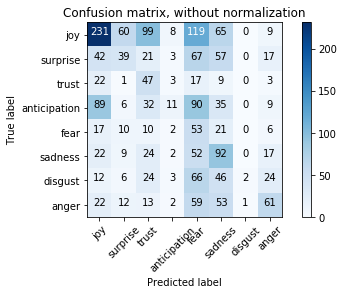

Normalized confusion matrix


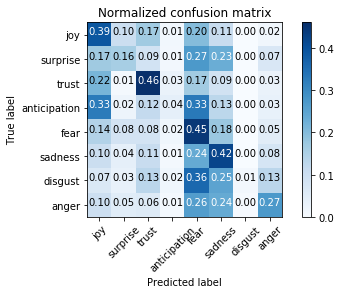

In [43]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cfm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()